<a href="https://colab.research.google.com/github/KarinaRmzG/TT-II-EVC-CNN/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Preprocesameinto de una sola imagen

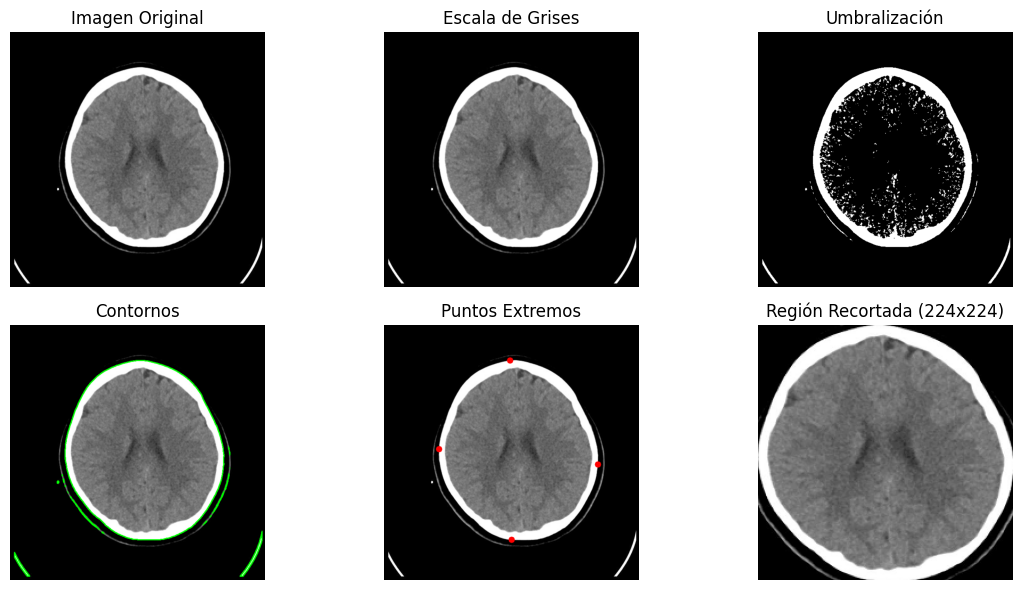

In [7]:
# Importar las bibliotecas necesarias
import cv2  # OpenCV para manipulación de imágenes
import numpy as np  # Biblioteca NumPy para operaciones numéricas
import matplotlib.pyplot as plt  # Biblioteca Matplotlib para visualización

# Definir la función para visualizar contornos y puntos extremos
def visualize_contour_and_extremes(image_path):
    # Leer la imagen desde la ruta proporcionada
    img = cv2.imread(image_path)

    # Convertir el espacio de color de BGR a RGB para visualización en Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Aplicar umbralización para resaltar los contornos
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Encontrar contornos en la imagen umbralizada
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crear una copia de la imagen original para visualización de contornos
    img_contours = img_rgb.copy()

    # Dibujar contornos en la copia
    cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

    # Seleccionar el contorno más grande basado en el área
    largest_contour = max(contours, key=cv2.contourArea)

    # Calcular puntos extremos (izquierdo, derecho, superior, inferior) del contorno más grande
    leftmost = tuple(largest_contour[largest_contour[:, :, 0].argmin()][0])  # Punto más a la izquierda en el contorno
    rightmost = tuple(largest_contour[largest_contour[:, :, 0].argmax()][0])  # Punto más a la derecha en el contorno
    topmost = tuple(largest_contour[largest_contour[:, :, 1].argmin()][0])  # Punto más arriba en el contorno
    bottommost = tuple(largest_contour[largest_contour[:, :, 1].argmax()][0])  # Punto más abajo en el contorno


    # Crear una copia de la imagen original para visualizar puntos extremos
    img_extremes = img_rgb.copy()

    # Dibujar círculos en los puntos extremos
    # Dibujar puntos extremos
    cv2.circle(img_extremes, leftmost, 8, (255, 0, 0), -1)  # Dibujar un círculo en el punto más a la izquierda
    cv2.circle(img_extremes, rightmost, 8, (255, 0, 0), -1)  # Dibujar un círculo en el punto más a la derecha
    cv2.circle(img_extremes, topmost, 8, (255, 0, 0), -1)  # Dibujar un círculo en el punto más arriba
    cv2.circle(img_extremes, bottommost, 8, (255, 0, 0), -1)  # Dibujar un círculo en el punto más abajo


    # Recortar la región de interés utilizando los puntos extremos
    cropped_img = img[topmost[1]:bottommost[1], leftmost[0]:rightmost[0]]

    # Redimensionar la imagen recortada a 224x224
    cropped_img_resized = cv2.resize(cropped_img, (224, 224))

    # Visualizar cada paso utilizando subgráficos de Matplotlib
    plt.figure(figsize=(12, 6))  # Tamaño total de la figura

    # Subgráficos para cada paso del proceso
    plt.subplot(2, 3, 1), plt.imshow(img_rgb), plt.title('Imagen Original')
    plt.axis('off')  # Desactivar los números en los ejes X e Y
    plt.subplot(2, 3, 2), plt.imshow(gray, cmap='gray'), plt.title('Escala de Grises')
    plt.axis('off')
    plt.subplot(2, 3, 3), plt.imshow(thresh, cmap='gray'), plt.title('Umbralización')
    plt.axis('off')
    plt.subplot(2, 3, 4), plt.imshow(img_contours), plt.title('Contornos')
    plt.axis('off')
    plt.subplot(2, 3, 5), plt.imshow(img_extremes), plt.title('Puntos Extremos')
    plt.axis('off')
    plt.subplot(2, 3, 6), plt.imshow(cropped_img_resized), plt.title('Región Recortada (224x224)')
    plt.axis('off')

    # Ajustar el diseño para evitar superposiciones
    plt.tight_layout()

    # Mostrar la figura con los subgráficos
    plt.show()

# Ruta de la imagen a procesar
image_path = '/content/drive/MyDrive/Brain_Stroke_CT-SCAN_image/Test/Normal/106 (20).jpg'

# Visualizar el proceso llamando a la función
visualize_contour_and_extremes(image_path)

#Preprocesameinto en carpetas

In [14]:
import os

# Ruta de la carpeta de entrada y salida
input_folder = '/content/drive/MyDrive/Brain_Stroke_CT-SCAN_image/Validation/Normal'
output_folder = '/content/drive/MyDrive/Brain_EVC_cropped/Validation/Normal'

# Obtener la lista de archivos en la carpeta de entrada
image_files = os.listdir(input_folder)

# Iterar sobre cada archivo en la carpeta de entrada
for image_file in image_files:
    # Construir la ruta completa de la imagen de entrada
    input_image_path = os.path.join(input_folder, image_file)

    # Leer la imagen y aplicar el proceso
    img = cv2.imread(input_image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)
    leftmost = tuple(largest_contour[largest_contour[:, :, 0].argmin()][0])
    rightmost = tuple(largest_contour[largest_contour[:, :, 0].argmax()][0])
    topmost = tuple(largest_contour[largest_contour[:, :, 1].argmin()][0])
    bottommost = tuple(largest_contour[largest_contour[:, :, 1].argmax()][0])
    cropped_img = img[topmost[1]:bottommost[1], leftmost[0]:rightmost[0]]
    cropped_img_resized = cv2.resize(cropped_img, (224, 224))

    # Construir la ruta completa de la imagen de salida
    output_image_path = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}_cropped.png")

    # Guardar la imagen recortada en la carpeta de salida
    cv2.imwrite(output_image_path, cropped_img_resized)

    #Visualizar
    #visualize_contour_and_extremes(input_image_path)